In [1]:
from learningAgent import LearningAlgorithm
from environment import Model, AdversaryModes
from Qtable import QTable
from test import Test
import numpy as np

In [2]:
np.random.seed(10)

In [3]:
total_Demand = 400
agent_Cost = 57
adv_Cost = 71 
tuple_Costs = [57,71]
total_Stages = 25
init_State = [total_Demand/2, total_Demand/2]
adversaryProbs=[0]*len(AdversaryModes)
adversaryProbs[0]=1 # We only train against strategies that do not take into account the 
# previous actions (myopic or constant strategies).

game = Model(total_Demand, [agent_Cost,adv_Cost], total_Stages, adversaryProbs)

In [4]:
num_Actions = 100
num_States = abs(adv_Cost - agent_Cost) + 2 * num_Actions + 2

In [5]:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+demoninator)
Qtable = QTable(num_States, num_Actions, learning_Rate = [490000,500000])

In [6]:
numberEpisodes = 20_000_000
discountFactor = 0.99

In [7]:
algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)

In [8]:
algorithm.solver()

In [9]:
# print(Qtable.Q_table)

In [10]:
# Qtable.Q_table.mean()

In [11]:
adversaryProbs=[0]*len(AdversaryModes)
adversaryProbs[0]=1 # We can test the Q-Table against any strategy. 

In [12]:
result = Test(game, Qtable, discountFactor, adversaryProbs)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

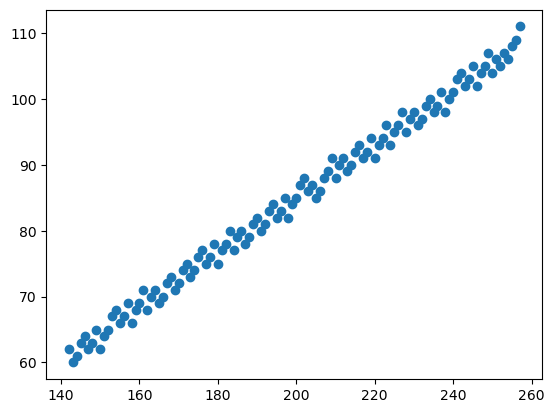

In [14]:
# The following plots what the Q-Table says is the best action in each state
states, bestResponses = result.bestResponses()
plt.scatter(states,bestResponses)
plt.show()

In [15]:
# Returns the optimal payoff and actions according to the Qtable
payoff, advPayoff, actions, advActions, demandPotential = result.totalPayoff()
print(payoff)
print(advPayoff)
print(actions)
print(advActions)
print(demandPotential)

43
46
48
48
48
48
49
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
156721.63152210606
35726.754399047146
[ 85  95 100 104 106 107 106 108 108 108 108 108 108 108 108 108 108 108
 108 108 108 108 108 108 108]
[135 123 116 112 110 109 108 108 108 108 108 108 108 108 108 108 108 108
 108 108 108 108 108 108 108]
[200. 225. 239. 247. 251. 253. 254. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]


In [16]:
# The percentage error of the Qtable. This has to be measured against the same opponent that 
# it was trained against, as this is a measure of how 'complete' the training is.
error = result.error()

In [17]:
error.mean()

1.2837417934833635e-05

In [18]:
# The following calculates the payoff that the Q-Table gives against the different opponenets. 
# It may reach a state in which the Q-Table was not trained. This will cause an error saying 
# either 'max action reached' or 'min action reached'.
# for i in range(len(AdversaryModes)):
#     print(AdversaryModes(i))
#     adversaryProbs=[0]*len(AdversaryModes)
#     adversaryProbs[i]=1
#     result = Test(game, Qtable, discountFactor, adversaryProbs)
#     payoff, advPayoff, actions, advActions, demandPotential = result.totalPayoff()
#     print(payoff)


AdversaryModes.myopic
43
46
48
48
48
48
49
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
156721.63152210606
AdversaryModes.constant_132
43
44
46
48
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
max action reached
46
165719.01093671267
AdversaryModes.constant_95
43
46
45
46
43
46
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
98123.03551390873
AdversaryModes.imitation_132
43
44
46
44
46
45
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
95230.3363386929
AdversaryModes.imitation_128
43
46
46
45
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
94560.3473074055
A